In [1]:

import pastaq as pq
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt

sample_data_dir = './data/'
exampleFile = sample_data_dir + '3_2_extract_3400_4100_590_615.mzML'
lcmsData = pq.read_mzml(exampleFile)

params = pq.default_parameters()
print(params)


{'instrument_type': 'orbitrap', 'resolution_ms1': 70000, 'resolution_msn': 30000, 'reference_mz': 200, 'avg_fwhm_rt': 9, 'num_samples_mz': 5, 'num_samples_rt': 5, 'smoothing_coefficient_mz': 0.4, 'smoothing_coefficient_rt': 0.4, 'warp2d_slack': 30, 'warp2d_window_size': 100, 'warp2d_num_points': 2000, 'warp2d_rt_expand_factor': 0.2, 'warp2d_peaks_per_window': 100, 'metamatch_fraction': 0.7, 'metamatch_n_sig_mz': 1.5, 'metamatch_n_sig_rt': 1.5, 'feature_detection_charge_states': [5, 4, 3, 2, 1], 'max_peaks': 1000000, 'polarity': 'both', 'min_mz': 0, 'max_mz': 100000, 'min_rt': 0, 'max_rt': 100000, 'link_n_sig_mz': 3, 'link_n_sig_rt': 3, 'ident_max_rank_only': True, 'ident_require_threshold': True, 'ident_ignore_decoy': True, 'similarity_num_peaks': 2000, 'qc_plot_palette': 'husl', 'qc_plot_extension': 'png', 'qc_plot_fill_alpha': 'dynamic', 'qc_plot_line_alpha': 0.5, 'qc_plot_scatter_alpha': 0.3, 'qc_plot_scatter_size': 2, 'qc_plot_min_dynamic_alpha': 0.1, 'qc_plot_per_file': False, 'qc

In [2]:
# show some things about the loaded data
print(dir(lcmsData.scans[10]))
print(lcmsData.scans[10].intensity[:20])


['__class__', '__delattr__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', 'intensity', 'ms_level', 'mz', 'num_points', 'polarity', 'precursor_information', 'retention_time', 'scan_number']
[36471.97265625, 125553.46875, 458265.34375, 1294302.25, 2171065.5, 2750183.5, 2128850.5, 1250171.875, 436476.4375, 100206.359375, 9660.17578125, 78741.0390625, 244341.46875, 449558.75, 644555.4375, 585050.5, 362398.875, 155760.484375, 31974.671875, 42083.60546875]


In [3]:
# resample the data to a uniform grid
grid = pq.resample(
            lcmsData,
            params['num_samples_mz'],
            params['num_samples_rt'],
            params['smoothing_coefficient_mz'],
            params['smoothing_coefficient_rt']
)
print(grid.data[:200])


[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.8707683810575126e-18, 7.853864728463177e-12, 2.060133646750191e-06, 0.03376804429680346, 34.619037769440936, 2250.48620368371, 11260.865485016082, 14276.613050718304, 15423.264936573869, 16722.684948399983, 18195.640006344456, 19914.384330088888, 23503.544991622333, 36727.529116532525, 67597.76358781586, 103965.24668514615, 128367.33332290957, 123350.05026584808, 96086.48542067791, 66690.15504528736, 40692.01314233405, 13724.191492399908, 12172.258090156525, 24845.614433730752, 37923.020482131506, 50121.84041663531, 55086.92854889723, 50743.84891256107, 51512.96627420846, 96635.58611695663, 2249

In [4]:
# find peaks in the grid and show some of them
peaks = pq.find_peaks(lcmsData, grid)
print(peaks[:10])

[Peak <id: 0, local_max_mz: 599.304356, local_max_rt: 3513.670024, local_max_height: 62914390.958689, fitted_height: 70606401.449003, fitted_mz: 599.303884, fitted_rt: 3514.521686, fitted_sigma_mz: 0.005467, fitted_sigma_rt: 8.642912, fitted_volume: 20961051.673313>, Peak <id: 1, local_max_mz: 598.969557, local_max_rt: 3513.670024, local_max_height: 61242749.040795, fitted_height: 68958235.639605, fitted_mz: 598.969726, fitted_rt: 3514.578535, fitted_sigma_mz: 0.005458, fitted_sigma_rt: 7.999369, fitted_volume: 18917611.696212>, Peak <id: 2, local_max_mz: 598.800782, local_max_rt: 3538.830132, local_max_height: 52880580.950962, fitted_height: 60359651.114492, fitted_mz: 598.801800, fitted_rt: 3540.870266, fitted_sigma_mz: 0.005439, fitted_sigma_rt: 10.729266, fitted_volume: 22132096.731648>, Peak <id: 3, local_max_mz: 611.290036, local_max_rt: 3439.986852, local_max_height: 38136932.427995, fitted_height: 44040207.378100, fitted_mz: 611.291363, fitted_rt: 3439.111528, fitted_sigma_mz: 

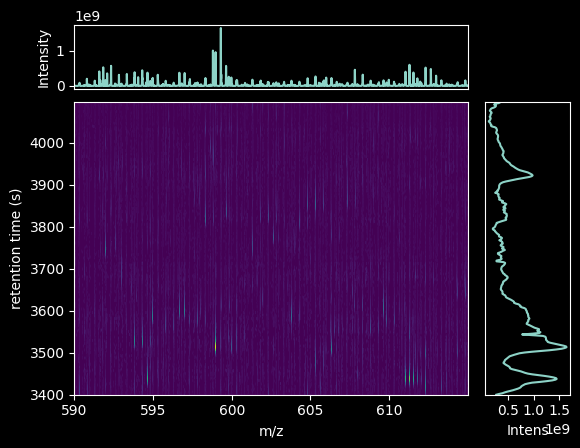

In [5]:
# display the grid
pq.plot_mesh(grid)
plt.show()
